In [1]:
import pyccl as ccl
print(f"I am using pyccl version {ccl.__version__}")
import numpy as np
from scripts.data_vectors import DataVectors
import scripts.data_vector_metrics as h
import scripts.plotting as p
import matplotlib.pyplot as plt
from scripts.presets import Presets
from scripts.galaxy_bias import GalaxyBias
from scripts.systematics_metrics import SystematicsMetrics

I am using pyccl version 2.8.0


In [2]:
redshift_max = 3.5
redshift_resolution = 300  # this is the first resolution of redshifts
forecast_year = "10"
# Please note that the redshift resolution is the number of redshifts between 0 and redshift_max.
# Additionally, a lot of parametric sweeping is already coded into helper functions 
# so we will not need to worry about that for now.

# We will also investigate ell binning but for this particular exercise,
# we will keep the ell binning at default values.
#ell_min = 20
#ell_max = 2000
#n_ell = 50

# We now initialize the class by only passing the redshift information.
presets = Presets(redshift_max=redshift_max,
                  redshift_resolution=redshift_resolution,
                  forecast_year=forecast_year)

gbias = GalaxyBias(presets).get_galaxy_bias()

In [3]:
%%time
sm = SystematicsMetrics(presets)
gbias_zres_sweep = sm.compare_galaxy_bias_over_zresolutions()

Data saved to data_output/galaxy_bias/galaxy_bias_resolutions_y10_zmax3.5_ccl_v2.8.0.npy
CPU times: user 8.92 s, sys: 234 ms, total: 9.15 s
Wall time: 9.29 s


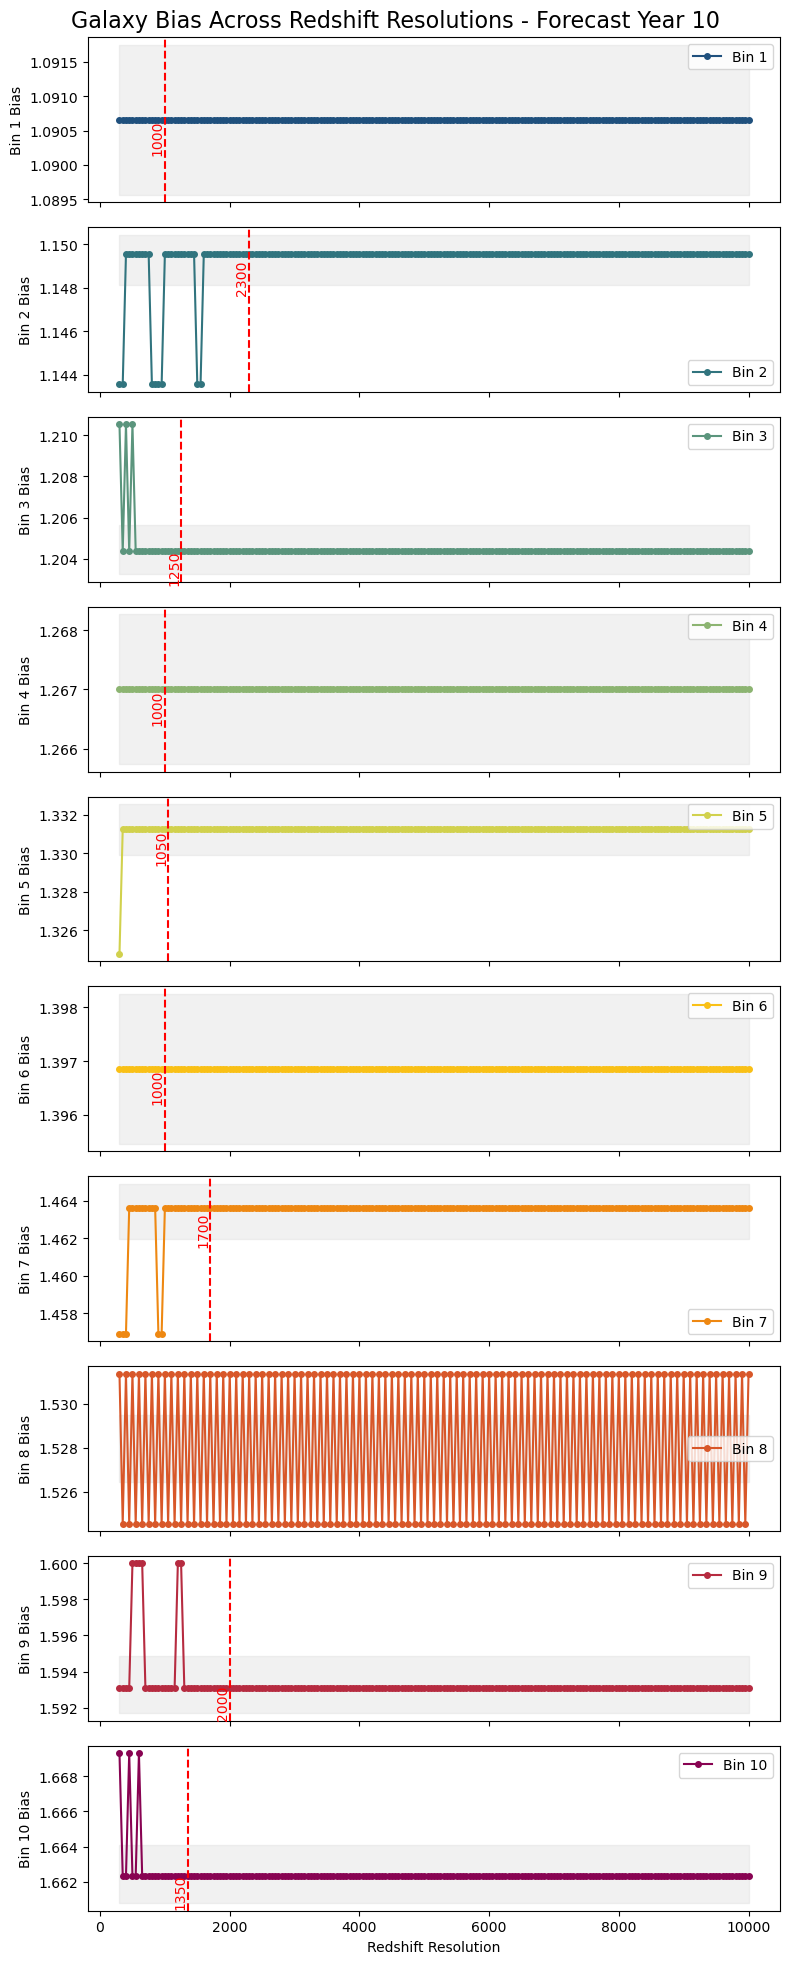

In [8]:
p.plot_galaxy_bias_resolutions(gbias_zres_sweep,
                               forecast_year=forecast_year,
                               precision=0.1,
                               stability_steps=15,
                               marker_size=4)

In [5]:
%%time
gbias_zmax_zres_sweep = sm.compare_galaxy_bias_over_zresolutions_and_zmax()

Data saved to data_output/galaxy_bias/galaxy_bias_resolutions_by_zmax_y10_zmax_range_3.0_to_4.0_ccl_v2.8.0.npy
CPU times: user 1min 24s, sys: 1.76 s, total: 1min 26s
Wall time: 1min 27s


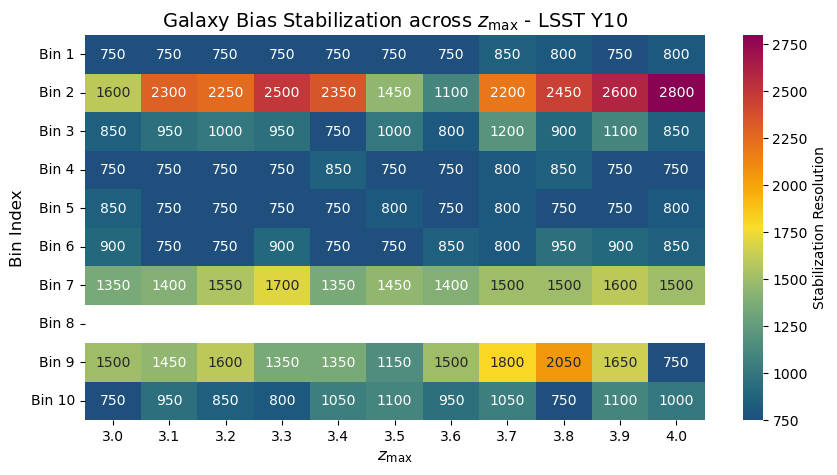

In [12]:
p.plot_galaxy_bias_stabilization_heatmap(gbias_zmax_zres_sweep,
                                         forecast_year,
                                         precision=0.2,
                                         stability_steps=10,
                                         annotate_max=False)